## Regresion Logistica Multinomial

Hasta ahora vimos el funcionamiento interno y la utilidad que puede llegar a tener la Regresion Logistica, aunque tiene una limitante importante, la cual es que tiene un comportamiento _binario_. Lo cual no nos permite tener mas de dos clasificaciones. 

Para resolver esto, podemos utilizar la _**Regresion Logistica Multinomial**_. Para ello utilizaremos dos metodos distintos: 
1. Estrategia One-vs-Rest.
2. Softmax Regression.

### 1. One-vs-Rest.

One versus Rest (OvR), tambien llamada _One versus All_ (OvA), es una tecnica que _**extiende**_ la clasificacion binaria a problemas multi clase. En general, asi es como funciona: 

- Se entrena un clasificador por clase a calificar, donde una clase es considerada como _la clase positiva_ y el resto como la _clase negativa_.

Por ejemplo: Digamos que tenemos que resolver un problema de reconocimiento de imagenes. El dataset contiene 4 clases, los digitos 0, 1, 2 y 3. El objetivo es clasificarlos. Usando el enfoque OvR, se tendria que usar 4 clasificadores binarios:

1. Clasificador binario 1: digito 0 vs digitos 1, 2 y 3.
2. Clasificador binario 2: digito 1 vs digitos 0, 2 y 3.
3. Clasificador binario 3: digito 2 vs digitos 0, 1 y 3.
4. Clasificador binario 4: digito 3 vs digitos 0, 1 y 2.

Y la hora de querer clasificar una nueva muestra, se utilizarian cada uno de estos clasificadores. El que tenga la probabilidad mas alta sera la clase predicha.

In [17]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

##### EDA (Analisis Exploratorio de Datos)

In [22]:
iris = load_iris()
print(iris.keys())

# Eligiendo columnas de interes.
columns = iris.feature_names + ['target']
print(columns)
iris_df = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=columns)
iris_df.describe()
# iris_df.head(20)
# iris_df.tail(20)
# iris_df.isnull().sum()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# Seleccionando datos de entrenamiento y prueba
# NOTA: Para este caso al ser tan pocos datos, usaremos todos para el entrenamiento.

X_train = iris_df[['petal length (cm)', 'petal width (cm)']]
Y_train = iris_df['target']

In [5]:
# Instanciando Modelo
lr_ovr =  LogisticRegression(
    solver='sag',
    max_iter=1000,
    random_state=42,
    multi_class='ovr'
)

# Ajustando modelo
lr_ovr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42,
                   solver='sag')

In [6]:
print(f"Accuracy = {lr_ovr.score(X_train, Y_train)}")

Accuracy = 0.9666666666666667


In [8]:
lr_ovr.intercept_

array([  7.80951078,  -2.21631896, -17.35898137])

In [7]:
lr_ovr.coef_

array([[-2.58531477, -1.07946479],
       [ 0.88567245, -1.5405395 ],
       [ 2.74026712,  2.38214674]])

#### Predicciones

In [9]:
lr_ovr.predict_proba(X_train[0:2])

array([[8.19091823e-01, 1.80906376e-01, 1.80108919e-06],
       [8.19091823e-01, 1.80906376e-01, 1.80108919e-06]])

In [10]:
lr_ovr.predict(X_train[0:2])

array([0., 0.])

In [13]:
predictions = lr_ovr.predict(X_train)
print(predictions)

accuracy = lr_ovr.score(X_train, Y_train)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


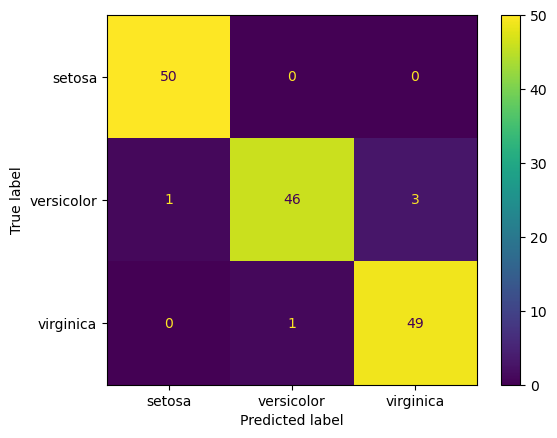

In [27]:
# Visualizacion de los resultados
cm = metrics.confusion_matrix(Y_train, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
cm_display.plot()

# plt.figure(figsize=(9,9))
# sns.heatmap(cm, 
#             annot=True,
#             fmt=".0f",
#             linewidths=.5,
#             square = True,
#             cmap = 'Blues')
# plt.ylabel('Actual label', fontsize = 17)
# plt.xlabel('Predicted label', fontsize = 17)
# plt.title(f'Accuracy Score: {accuracy:.3f}', size = 17)
# plt.tick_params(labelsize= 15)
plt.show()

Como podemos observar, nuestro modelo de _Regresion Logistica Multinomial_ erro 5 clasificaciones:
- Clasifico 1 como _setosa_ pero en realidad correspondia a _versicolor_.
- Clasifico 1 como _versicolor_ pero en realidad correspondia a _virginica_.
- Y por ultimo clasifico 3 como _virginica_ pero correspondian a _versicolor_. 

### Softmax Regression

Este metodo no entrena y combina multiples clasificadores binarios. <br>

En lugar de eso, la Softmax Regression calcula un _score_ $\; s_{k}(\mathbf{x}) \;$ por cada clase $\; k \;$, luego estima la probabilidad de cada clase aplicando la _**softmax function**_ (tambien llamada _normalized exponential_) de los _scores_. $$ s_{k}(\mathbf{x}) = \mathbf{x}^{T} \theta^{(k)} $$